In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [5]:
Tran_bhvr = pd.read_excel('/Users/sudaisamani/Downloads/QVI_transaction_data.xlsx',
sheet_name='in')
Pur_bhvr = pd.read_csv('/Users/sudaisamani/Downloads/QVI_purchase_behaviour.csv')
print(Tran_bhvr.head())
print(Pur_bhvr.head())
merged_data = pd.merge(Tran_bhvr, Pur_bhvr, on='LYLTY_CARD_NBR', how='inner')
print("Merged Data:")
print(merged_data.head())
print(merged_data.info())
print(merged_data.describe())

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004  

In [10]:
merged_data['DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(merged_data['DATE'], unit='D')
print(merged_data.head())
print(len(merged_data)) # 264836
print(len(Tran_bhvr)) # 264836
print(len(Pur_bhvr)) # 72637

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   

                LIFESTAGE PREMIUM_CUSTOMER  
0   YOUNG SINGLES/COUPLES          Premium  
1  MIDAGE SINGLES/COUPLES           Budget  
2  MIDAGE SINGLES/COUPLES           Budget  
3  MIDAGE SINGLES/COUPLES           Budget  

In [12]:
merged_data.info()
merged_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  int64         
 2   LYLTY_CARD_NBR    264836 non-null  int64         
 3   TXN_ID            264836 non-null  int64         
 4   PROD_NBR          264836 non-null  int64         
 5   PROD_NAME         264836 non-null  object        
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
 8   LIFESTAGE         264836 non-null  object        
 9   PREMIUM_CUSTOMER  264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.2+ MB


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


In [22]:
# Identify Missing Data
print("Missing values per column:\n", merged_data.isnull().sum())

Missing values per column:
 DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [24]:
# Remove Duplicates
merged_data.drop_duplicates(inplace=True)

In [26]:
# Remove Outliers from TOT_SALES
q1 = merged_data['TOT_SALES'].quantile(0.25)
q3 = merged_data['TOT_SALES'].quantile(0.75)
iqr = q3 - q1
lower_bound_sales = q1 - 1.5 * iqr
upper_bound_sales = q3 + 1.5 * iqr

filtered_data = merged_data[
    (merged_data['TOT_SALES'] >= lower_bound_sales) &
    (merged_data['TOT_SALES'] <= upper_bound_sales)
]

print(f"Original Data Size: {len(merged_data)}, Filtered Data Size: {len(filtered_data)}")

Original Data Size: 264835, Filtered Data Size: 264257


In [28]:
# Remove unreasonable product quantities
filtered_data = filtered_data[filtered_data['PROD_QTY'] <= 5]

In [30]:
# Reset index and create cleaned_data
cleaned_data = filtered_data.reset_index(drop=True)
print("\nCleaned Data Summary:\n", cleaned_data.describe())


Cleaned Data Summary:
                                 DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         264257  264257.000000    2.642570e+05   
mean   2018-12-30 00:57:22.176366080     135.076153    1.355462e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.002000e+04   
50%              2018-12-30 00:00:00     130.000000    1.303570e+05   
75%              2019-03-31 00:00:00     203.000000    2.030930e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.785525    8.058940e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.642570e+05  264257.000000  264257.000000  264257.000000  
mean   1.351547e+05      56.589820       1.900275       7.272280  
min    1.000000e+00       1.000000       1.000000       1.500000  
25%    6.759600e+04      28.000000       2.000000       5.400000  
5

In [32]:
# Extract BRAND from PROD_NAME
cleaned_data['BRAND'] = cleaned_data['PROD_NAME'].str.split(' ').str[0]
print(cleaned_data[['PROD_NAME', 'BRAND']].head())

                                  PROD_NAME    BRAND
0    Natural Chip        Compny SeaSalt175g  Natural
1                  CCs Nacho Cheese    175g      CCs
2    Smiths Crinkle Cut  Chips Chicken 170g   Smiths
3  Kettle Tortilla ChpsHny&Jlpno Chili 150g   Kettle
4  Old El Paso Salsa   Dip Tomato Mild 300g      Old


In [34]:
# Derive Brand Metrics
brand_metrics = cleaned_data.groupby('BRAND').agg(
    total_spend=('TOT_SALES', 'sum'),
    avg_spend=('TOT_SALES', 'mean'),
    total_transactions=('TXN_ID', 'nunique')
).reset_index()

brand_metrics_sorted = brand_metrics.sort_values(by='total_spend', ascending=False)
print("\nTop Brands by Total Spend:\n", brand_metrics_sorted.head())


Top Brands by Total Spend:
        BRAND  total_spend  avg_spend  total_transactions
12    Kettle     387066.2   9.408284               41110
20    Smiths     208994.7   7.254493               28785
6    Doritos     200234.2   8.042826               24879
16  Pringles     176730.5   7.054547               25043
15       Old      89958.9   9.689670                9283


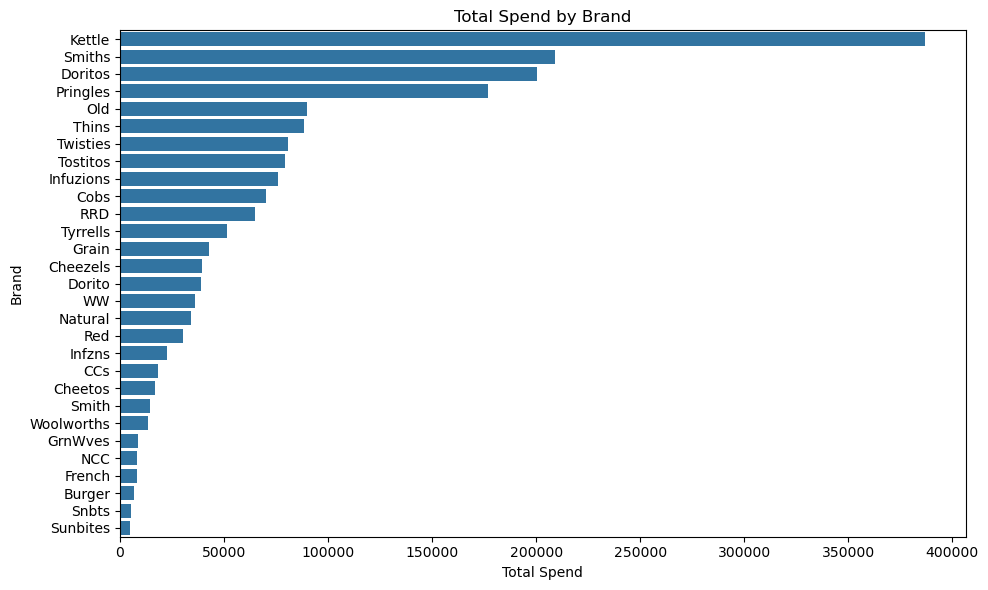

In [36]:
# Bar plot for Total Spend by Brand
plt.figure(figsize=(10, 6))
sns.barplot(x='total_spend', y='BRAND', data=brand_metrics_sorted)
plt.title('Total Spend by Brand')
plt.xlabel('Total Spend')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

In [38]:
# Extract Pack Size
cleaned_data['Pack_Size'] = cleaned_data['PROD_NAME'].str.extract(r'(\d+)g').astype(float)

In [40]:
# Transaction Count by Pack Size
pack_size_metrics = cleaned_data.groupby('Pack_Size').size().reset_index(name='transaction_count')
print(pack_size_metrics.head())

   Pack_Size  transaction_count
0       70.0               1507
1       90.0               3008
2      110.0              22335
3      125.0               1454
4      134.0              25052


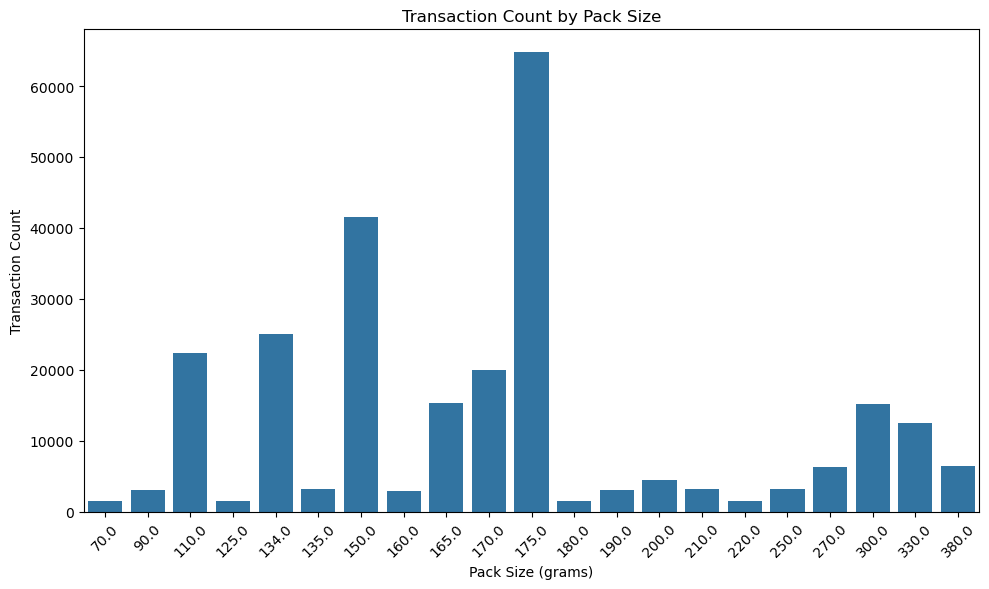

In [42]:
# Bar plot for Pack Size
plt.figure(figsize=(10, 6))
sns.barplot(x='Pack_Size', y='transaction_count', data=pack_size_metrics)
plt.title('Transaction Count by Pack Size')
plt.xlabel('Pack Size (grams)')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
# Total Spend by Customer Segment
segment_metrics = cleaned_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
print(segment_metrics.head())

                LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0  MIDAGE SINGLES/COUPLES           Budget   35309.20
1  MIDAGE SINGLES/COUPLES       Mainstream   90178.20
2  MIDAGE SINGLES/COUPLES          Premium   58095.55
3            NEW FAMILIES           Budget   21862.25
4            NEW FAMILIES       Mainstream   16940.35


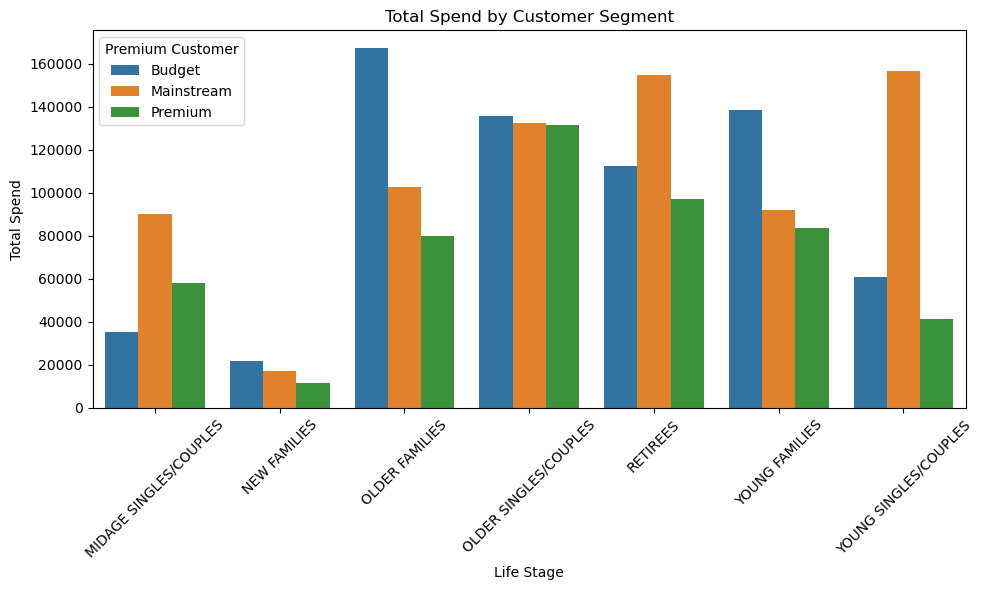

In [46]:
# Bar plot for Spend by Segment
plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=segment_metrics)
plt.title('Total Spend by Customer Segment')
plt.xlabel('Life Stage')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.tight_layout()
plt.show()